In [25]:
import os
import pandas as pd
import numpy as np
import yaml

import seaborn as sns
import matplotlib.pyplot as plt

import re

from utils.training_utils import get_features_attribute

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
df_raw = pd.read_parquet(os.path.join('..', 'data', 'raw', 'amostra_raw.parquet'))

print(df_raw.shape)
df_raw.head()

(285195, 37)


,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,address,attributes,installments,winner_item_id,catalog_listing,discounts,promotion_decorations,promotions,inventory_id,official_store_name,location,seller_contact
0,MEC591721600,Consolas Play Station 5 Slim Edicion Digital,new,790276-MLU77965322054_082024,MEC29001054,gold_pro,,https://www.mercadolibre.com.ec/consolas-play-...,buy_it_now,MEC,MEC3533,MEC-GAME_CONSOLES,http://http2.mlstatic.com/D_790276-MLU77965322...,USD,1,659.00,NaN,"{'amount': 659.0, 'conditions': {'context_rest...",50,NaN,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-11-15T04:00:00.000Z,"{'id': 63228264, 'nickname': 'MEGACELLCOM'}","{'city_id': 'RUMtUUnDsWFxdWl0bw', 'city_name':...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,None,True,None,None,None,None,None,None,None
1,MEC585311472,Auriculares Inalámbricos Xiaomi Redmi Buds 6 P...,new,742884-MLA79765825031_102024,MEC39962085,bronze,,https://www.mercadolibre.com.ec/auriculares-in...,buy_it_now,MEC,MEC121963,MEC-HEADPHONES,http://http2.mlstatic.com/D_742884-MLA79765825...,USD,2,36.89,44.99,"{'amount': 36.89, 'conditions': {'context_rest...",1,NaN,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-09-17T04:00:00.000Z,"{'id': 173825591, 'nickname': 'MAS_STORE'}","{'city_id': 'RUMtUUNhcmNlbMOpbg', 'city_name':...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,None,True,None,None,None,None,None,None,None
2,MEC573483608,Microsoft Xbox Series X 1tb Carbon Black,new,942133-MLA74651936102_022024,MEC16160759,bronze,,https://www.mercadolibre.com.ec/microsoft-xbox...,buy_it_now,MEC,MEC3533,MEC-GAME_CONSOLES,http://http2.mlstatic.com/D_942133-MLA74651936...,USD,3,887.43,986.04,"{'amount': 887.43, 'conditions': {'context_res...",50,63508.0,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-05-11T04:00:00.000Z,"{'id': 200533006, 'nickname': 'GAMING.EC'}","{'city_id': 'RUMtWVFUYXJxdWk', 'city_name': 'T...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,None,True,None,None,None,None,GAMINGEC,None,None
3,MEC571416556,Auriculares Gamer G435 Logitech G Wireless Gam...,new,681820-MLU77493029189_072024,MEC18651916,bronze,,https://www.mercadolibre.com.ec/auriculares-ga...,buy_it_now,MEC,MEC116670,MEC-HEADPHONES,http://http2.mlstatic.com/D_681820-MLU77493029...,USD,4,82.22,91.36,"{'amount': 82.22, 'conditions': {'context_rest...",1,63508.0,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-04-19T04:00:00.000Z,"{'id': 200533006, 'nickname': 'GAMING.EC'}","{'city_id': 'RUMtWVFUYXJxdWk', 'city_name': 'T...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,None,True,None,None,None,None,GAMINGEC,None,None
4,MEC568777050,Oculus Quest 2 Advanced All In One Casco Vr 12...,new,929895-MLA51988203957_102022,MEC21236885,bronze,,https://www.mercadolibre.com.ec/oculus-quest-2...,buy_it_now,MEC,MEC3533,MEC-GAME_CONSOLES,http://http2.mlstatic.com/D_929895-MLA51988203...,USD,5,443.70,493.00,"{'amount': 443.7, 'conditions': {'context_rest...",1,63508.0,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-04-11T18:10:25.097Z,"{'id': 200533006, 'nickname': 'GAMING.EC'}","{'city_id': 'RUMtWVFUYXJxdWk', 'city_name': 'T...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,None,True,None,None,None,None,GAMINGEC,None,None


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285195 entries, 0 to 285194
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     285195 non-null  object 
 1   title                  285195 non-null  object 
 2   condition              274680 non-null  object 
 3   thumbnail_id           285195 non-null  object 
 4   catalog_product_id     135672 non-null  object 
 5   listing_type_id        285195 non-null  object 
 6   sanitized_title        285195 non-null  object 
 7   permalink              285195 non-null  object 
 8   buying_mode            285195 non-null  object 
 9   site_id                285195 non-null  object 
 10  category_id            285195 non-null  object 
 11  domain_id              285195 non-null  object 
 12  thumbnail              285195 non-null  object 
 13  currency_id            278614 non-null  object 
 14  order_backend          285195 non-nu

In [4]:
(df_raw.shape[0] - df_raw.isnull().sum()) / (df_raw.shape[0])

id                       1.000000
title                    1.000000
condition                0.963130
thumbnail_id             1.000000
catalog_product_id       0.475717
listing_type_id          1.000000
sanitized_title          1.000000
permalink                1.000000
buying_mode              1.000000
site_id                  1.000000
category_id              1.000000
domain_id                1.000000
thumbnail                1.000000
currency_id              0.976925
order_backend            1.000000
price                    0.976925
original_price           0.235369
sale_price               0.838472
available_quantity       1.000000
official_store_id        0.224920
use_thumbnail_id         1.000000
accepts_mercadopago      1.000000
shipping                 1.000000
stop_time                1.000000
seller                   0.999993
address                  0.977454
attributes               1.000000
installments             0.437704
winner_item_id           0.000000
catalog_listin

In [5]:
df_raw.columns[df_raw.isnull().all()]

Index(['winner_item_id', 'discounts', 'promotion_decorations', 'promotions'], dtype='object')

In [6]:
df_raw = df_raw.dropna(axis=1, how='all')

print(df_raw.shape)
df_raw.head()

(285195, 33)


,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,address,attributes,installments,catalog_listing,inventory_id,official_store_name,location,seller_contact
0,MEC591721600,Consolas Play Station 5 Slim Edicion Digital,new,790276-MLU77965322054_082024,MEC29001054,gold_pro,,https://www.mercadolibre.com.ec/consolas-play-...,buy_it_now,MEC,MEC3533,MEC-GAME_CONSOLES,http://http2.mlstatic.com/D_790276-MLU77965322...,USD,1,659.00,NaN,"{'amount': 659.0, 'conditions': {'context_rest...",50,NaN,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-11-15T04:00:00.000Z,"{'id': 63228264, 'nickname': 'MEGACELLCOM'}","{'city_id': 'RUMtUUnDsWFxdWl0bw', 'city_name':...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,True,None,None,None,None
1,MEC585311472,Auriculares Inalámbricos Xiaomi Redmi Buds 6 P...,new,742884-MLA79765825031_102024,MEC39962085,bronze,,https://www.mercadolibre.com.ec/auriculares-in...,buy_it_now,MEC,MEC121963,MEC-HEADPHONES,http://http2.mlstatic.com/D_742884-MLA79765825...,USD,2,36.89,44.99,"{'amount': 36.89, 'conditions': {'context_rest...",1,NaN,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-09-17T04:00:00.000Z,"{'id': 173825591, 'nickname': 'MAS_STORE'}","{'city_id': 'RUMtUUNhcmNlbMOpbg', 'city_name':...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,True,None,None,None,None
2,MEC573483608,Microsoft Xbox Series X 1tb Carbon Black,new,942133-MLA74651936102_022024,MEC16160759,bronze,,https://www.mercadolibre.com.ec/microsoft-xbox...,buy_it_now,MEC,MEC3533,MEC-GAME_CONSOLES,http://http2.mlstatic.com/D_942133-MLA74651936...,USD,3,887.43,986.04,"{'amount': 887.43, 'conditions': {'context_res...",50,63508.0,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-05-11T04:00:00.000Z,"{'id': 200533006, 'nickname': 'GAMING.EC'}","{'city_id': 'RUMtWVFUYXJxdWk', 'city_name': 'T...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,True,None,GAMINGEC,None,None
3,MEC571416556,Auriculares Gamer G435 Logitech G Wireless Gam...,new,681820-MLU77493029189_072024,MEC18651916,bronze,,https://www.mercadolibre.com.ec/auriculares-ga...,buy_it_now,MEC,MEC116670,MEC-HEADPHONES,http://http2.mlstatic.com/D_681820-MLU77493029...,USD,4,82.22,91.36,"{'amount': 82.22, 'conditions': {'context_rest...",1,63508.0,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-04-19T04:00:00.000Z,"{'id': 200533006, 'nickname': 'GAMING.EC'}","{'city_id': 'RUMtWVFUYXJxdWk', 'city_name': 'T...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,True,None,GAMINGEC,None,None
4,MEC568777050,Oculus Quest 2 Advanced All In One Casco Vr 12...,new,929895-MLA51988203957_102022,MEC21236885,bronze,,https://www.mercadolibre.com.ec/oculus-quest-2...,buy_it_now,MEC,MEC3533,MEC-GAME_CONSOLES,http://http2.mlstatic.com/D_929895-MLA51988203...,USD,5,443.70,493.00,"{'amount': 443.7, 'conditions': {'context_rest...",1,63508.0,True,True,"{'benefits': None, 'free_shipping': True, 'log...",2044-04-11T18:10:25.097Z,"{'id': 200533006, 'nickname': 'GAMING.EC'}","{'city_id': 'RUMtWVFUYXJxdWk', 'city_name': 'T...","[{'attribute_group_id': 'OTHERS', 'attribute_g...",None,True,None,GAMINGEC,None,None


In [7]:
df_raw['category_id_tratado'] = df_raw.category_id.apply(lambda x: x[3:])

print(f"Número de categorias distintas (considerando o ID do país): {df_raw['category_id'].nunique()}")
print(f"Número de categorias distintas (após tratamento): {df_raw['category_id_tratado'].nunique()}")

Número de categorias distintas (considerando o ID do país): 25011
Número de categorias distintas (após tratamento): 15210


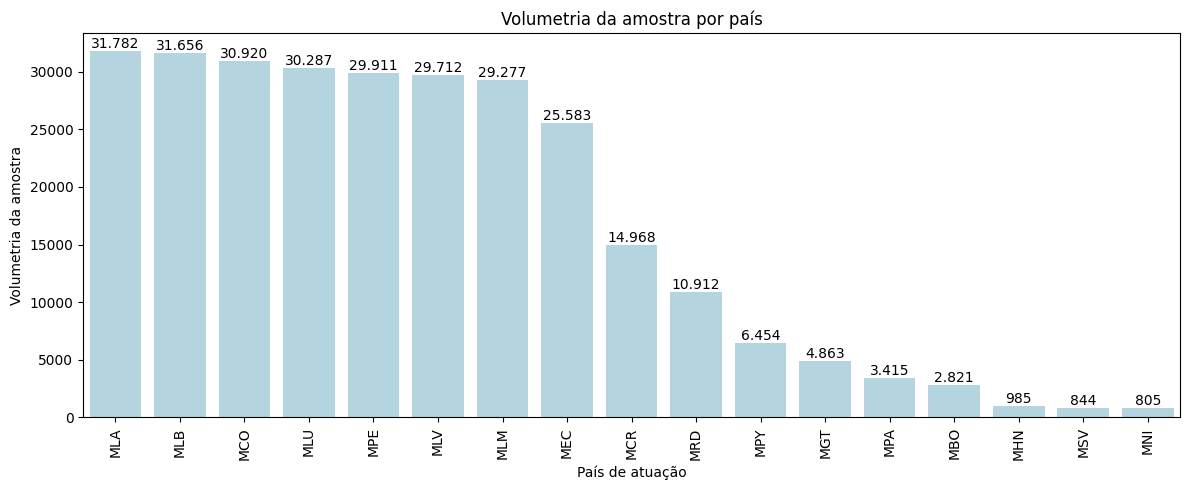

In [8]:
region_counts = df_raw['site_id'].value_counts()

plt.figure(figsize = (12, 5))
ax = sns.barplot(
    x = region_counts.index,
    y = region_counts.values,
    color = 'lightblue'
)

plt.xticks(rotation=90)

for container in ax.containers:
    labels = [f"{val.get_height():,.0f}".replace(',', '.') for val in container]
    ax.bar_label(container, labels=labels) 

plt.xlabel('País de atuação')
plt.ylabel('Volumetria da amostra')
plt.title('Volumetria da amostra por país')
plt.tight_layout()
plt.show()

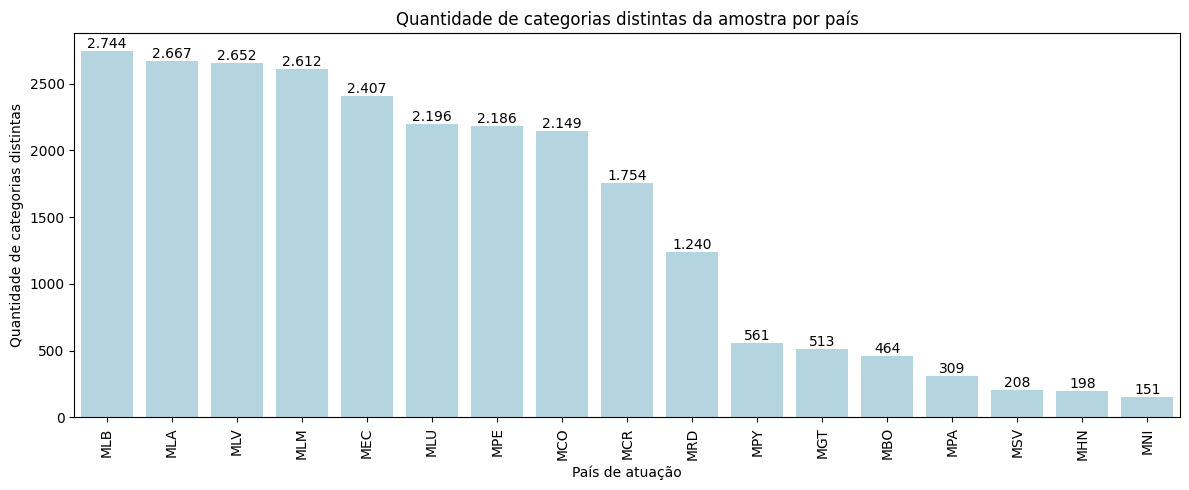

In [9]:
plt.figure(figsize = (12, 5))

ax = sns.barplot(
    x = 'site_id', 
    y = 'num_categories', 
    color = 'lightblue', 
    data = (
        df_raw
        .groupby('site_id', as_index=False)['category_id_tratado']
        .nunique()
        .rename(columns = {'category_id_tratado': 'num_categories'})
    ).sort_values(by = 'num_categories', ascending = False)
)

plt.xticks(rotation=90)

for container in ax.containers:
    labels = [f"{val.get_height():,.0f}".replace(',', '.') for val in container]
    ax.bar_label(container, labels=labels) 

plt.xlabel('País de atuação')
plt.ylabel('Quantidade de categorias distintas')
plt.title('Quantidade de categorias distintas da amostra por país')
plt.tight_layout()

plt.show()


In [10]:
df_raw.buying_mode.unique()

array(['buy_it_now', 'classified'], dtype=object)

In [11]:
df_counts = (
    df_raw
    .groupby(['buying_mode', 'site_id'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

modes = df_counts['buying_mode'].unique()

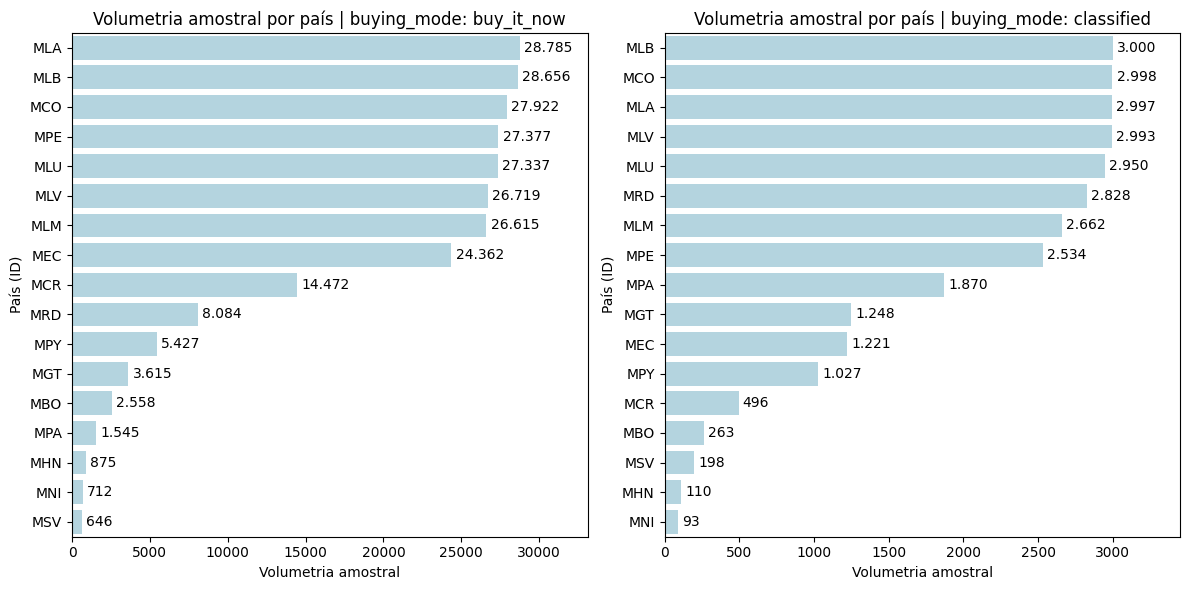

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = len(modes), figsize = (12, 6))

for ax, mode in zip(axes, modes):
    df_mode = df_counts[df_counts['buying_mode'] == mode]
    
    df_mode_sorted = df_mode.sort_values(by = 'count', ascending=False)
    
    sns.barplot(
        data=df_mode_sorted,
        y = 'site_id',
        x = 'count',
        ax = ax,
        color = 'lightblue',
        order=df_mode_sorted['site_id']
    )
    
    ax.set_title(f"Volumetria amostral por país | buying_mode: {mode}")
    ax.set_xlabel("Volumetria amostral")
    ax.set_ylabel("País (ID)")
    
    for container in ax.containers:
        labels = [f"{bar.get_width():,.0f}".replace(',', '.') for bar in container]
        ax.bar_label(container, labels=labels, fmt="", padding=3)
    
    ax.set_xlim(0, df_mode_sorted['count'].max() * 1.15)

plt.tight_layout()
plt.show()

In [13]:
df_raw.loc[(df_raw.sale_price.isna()), 'sale_price_type'] = '<vazio>'
df_raw.loc[~(df_raw.sale_price.isna()), 'sale_price_type'] = df_raw[df_raw.sale_price_type != '<vazio>'].sale_price.apply(lambda x: x.get('type'))

In [14]:
df_raw.groupby('buying_mode').sale_price_type.value_counts(dropna=False)

buying_mode  sale_price_type
buy_it_now   standard           151442
             promotion           66034
             <vazio>             37934
             BNSP                  192
             SPONTH                100
             BNGM                    5
classified   standard            21348
             <vazio>              8133
             promotion               7
Name: sale_price_type, dtype: int64

### Análise da feature `attributes`

In [15]:
def attribute_extract(attributes, key):
    
    if not isinstance(attributes, (list, tuple, np.ndarray)):
        return None
    
    for attribute in attributes:
        if isinstance(attribute, dict) and attribute.get('id') == key:
            return attribute.get('value_name')
    
    return None

In [16]:
features_attribute = ['BRAND', 'COLOR', 'MAIN_COLOR', 'WEIGHT']

for feature in features_attribute:
    df_raw[f'{feature.lower()}_value'] = df_raw.attributes.apply(lambda x: attribute_extract(x, feature))

### Atributo: `brand_value` (marca)

Como é de se esperar, o mercado livre vende produtos de diversas marcas no seu marketplace. Assim, para um modelo de machine learning, é válido analisar as categorias (marcas) mais frequentes na amostra e agrupar as demais em uma mesma classe, por exemplo, `<outros>`. Portanto, analisou-se as 10 marcas mais frequentes de produtos que não estavam em promoção, bem como as mais frequentes de produtos que estavam.

In [73]:
def brand_processing(brand):
    if brand is not None:
        brand = brand.lower()
        return re.sub(r'[^\w\s]', '', brand)
    else:
        return '<vazio>'

In [74]:
df_raw['brand_value'] = df_raw['brand_value'].apply(brand_processing)

In [75]:
df_raw[df_raw.sale_price_type != 'promotion'].brand_value.value_counts(normalize=True).head(10)

<vazio>      0.222989
genérica     0.037677
samsung      0.010020
sony         0.009619
xiaomi       0.006849
apple        0.006648
casio        0.005754
nintendo     0.004846
toyota       0.004700
chevrolet    0.004171
Name: brand_value, dtype: float64

In [76]:
df_raw[df_raw.sale_price_type == 'promotion'].brand_value.value_counts(normalize=True).head(10)

genérica    0.040763
<vazio>     0.035236
truper      0.010130
samsung     0.008888
xiaomi      0.007889
sony        0.007465
total       0.007193
casio       0.005678
apple       0.005648
lenovo      0.005285
Name: brand_value, dtype: float64

Observe que, embora a ordem não seja a mesma (o que pode ser útil para discriminar), muitas marcas estão presentes em ambas subpopulações de tipo de venda (`sale_price_type`).

### Atributo: `color_value` e `main_color_value` (cor)

Uma outra hipótese é que a cor do produto pode discriminar e ditar se deve ser uma promoção e seu respectivo desconto, uma vez que produtos menos desejados possam ocupar mais tempo no estoque e, portanto, necessitar de promoções para serem "queimados".

In [68]:
df_raw.color_value.value_counts(normalize=True).head(15)

Negro           0.263032
Blanco          0.122814
Preto           0.052697
Gris            0.052513
Azul            0.049591
Plateado        0.035519
Rojo            0.028569
Branco          0.023419
Verde           0.019050
Rosa            0.017150
Amarillo        0.015604
Naranja         0.012384
Transparente    0.009518
Black           0.008100
BLACK           0.007844
Name: color_value, dtype: float64

In [52]:
def color_name_processing(color):
    if color is not None:
        color = color.lower()
        color = re.sub(r'[^\w\s]', '', color)

        color_dict = {
            'black': ['negro', 'preto'],
            'white': ['blanco', 'branco'],
            'gray': ['gris', 'cinza'],
            'dark gray': ['gris oscuro', 'cinza escuro'],
            'blue': ['azul', 'azul marinho', 'marinho'],
            'silver': ['plateado', 'prateado', 'prata', 'plata'],
            'red': ['rojo', 'vermelho'],
            'green': ['verde'],
            'pink': ['rosa'],
            'yellow': ['amarillo', 'amarelo'],
            'orange': ['naranja', 'laranja'],
            'transparent': ['transparente'],
            'multicolor': ['multicolor'],
            'turquoise': ['turquesa'],
            'brown': ['marron', 'marrom'],
            'purple': ['purpura', 'roxo'],
            'gold': ['dorado', 'ouro'],
            'beige': ['beige', 'bege'],
            'maroon': ['granate', 'marrom escuro'],
            'violet': ['violeta'],
            'magenta': ['magenta'],
            'salmon': ['salmao', 'salmon'],
        }

        if color in color_dict:
            return color
        else:
            for standard_color, aliases in color_dict.items():
                if color in aliases:
                    return standard_color
            return '<other>'
    else:
        return '<vazio>'

In [70]:
df_raw['color_value'] = df_raw.color_value.apply(color_name_processing)

In [71]:
df_raw[df_raw.sale_price_type != 'promotion'].color_value.value_counts(normalize=True).head(10)

<vazio>    0.795797
black      0.067596
<other>    0.041441
white      0.032644
gray       0.012995
blue       0.009938
silver     0.009687
red        0.007588
green      0.003819
yellow     0.003719
Name: color_value, dtype: float64

In [72]:
df_raw[df_raw.sale_price_type == 'promotion'].color_value.value_counts(normalize=True).head(10)

<vazio>    0.610166
black      0.130298
<other>    0.090035
white      0.049590
blue       0.020820
gray       0.020457
silver     0.015824
red        0.010206
yellow     0.009176
green      0.008040
Name: color_value, dtype: float64

In [79]:
df_raw['main_color_value'] = df_raw.main_color_value.apply(color_name_processing)

In [81]:
df_raw[df_raw.sale_price_type != 'promotion'].main_color_value.value_counts(normalize=True).head(10)


<vazio>    0.936401
black      0.027018
white      0.010988
blue       0.004645
gray       0.004212
<other>    0.004020
silver     0.002738
red        0.002085
green      0.001816
pink       0.001798
Name: main_color_value, dtype: float64

In [80]:
df_raw[df_raw.sale_price_type == 'promotion'].main_color_value.value_counts(normalize=True).head(10)


<vazio>    0.840175
black      0.066974
white      0.024303
gray       0.014022
blue       0.011644
<other>    0.010811
silver     0.007722
red        0.004664
pink       0.004361
green      0.004119
Name: main_color_value, dtype: float64

### Atributo: `weight_value` (peso)

Notou-se que a variável referente ao peso (`weight_value`) é uma string que acompanha o valor e sua unidade de medida. Então, decidiu-se uniformizá-la para uma única unidade (`g`) e transformá-la em numérica. Assim, primeiramente, analisou-se quais eram as unidades de medidas presente na amostra e, posteriormente, fez o mapping de sua respectiva conversão para grama.

In [ ]:
pattern = r'([\d.,]+)\s*([a-zA-Z]+)'

unit_analyses = df_raw['weight_value'].str.extract(pattern, flags=re.IGNORECASE)
unit_analyses.columns = ['valor', 'unidade']
unit_analyses.unidade.unique()

array(['kg', nan, 'g', 'lb', 'oz', 'mg', 't', 'mcg'], dtype=object)

In [152]:
def weight_processing(weight_str_value):

    if type(weight_str_value) == str:
        if weight_str_value.strip() != '':
            value, unit = re.match(r'(-?[\d.,]+)\s*([a-zA-Z]+)', weight_str_value.strip().lower(), re.IGNORECASE).groups()
            conversao = {
                'kg': 1000,
                'g': 1,
                'lb': 453.592,
                'oz': 28.3495,
                'mg': 0.001,
                'mcg': 0.000001,
                't': 1000000
            }
            mult = conversao.get(unit, np.nan)
            return float(value)*mult
    return np.nan

In [131]:
df_raw.iloc[42726]

id                                                          MLA1703824864
title                   Femmto Griferia Ducha Negra Monocomando Exteri...
condition                                                             new
thumbnail_id                                 726836-MLU78735428931_082024
catalog_product_id                                            MLA34213447
listing_type_id                                              gold_special
sanitized_title                                                          
permalink               https://www.mercadolibre.com.ar/femmto-griferi...
buying_mode                                                    buy_it_now
site_id                                                               MLA
category_id                                                     MLA436134
domain_id                                               MLA-SHOWER_PANELS
thumbnail               http://http2.mlstatic.com/D_726836-MLU78735428...
currency_id                           

In [158]:
df_raw['weight_value'] = df_raw['weight_value'].apply(weight_processing)

In [160]:
df_raw[df_raw.sale_price_type != 'promotion']['weight_value'].describe()

count    3.163400e+04
mean     3.224247e+06
std      5.104158e+08
min     -3.000000e+04
25%      1.500000e+02
50%      4.000000e+02
75%      1.900000e+03
max      9.010011e+10
Name: weight_value, dtype: float64

In [161]:
df_raw[df_raw.sale_price_type == 'promotion']['weight_value'].describe()

count    1.760100e+04
mean     1.496492e+04
std      1.888311e+05
min     -1.000000e+03
25%      1.860000e+02
50%      9.000000e+02
75%      3.300000e+03
max      1.111100e+07
Name: weight_value, dtype: float64

In [10]:
df_raw[~(df_raw.location.isna())]['location']

10755     {'address_line': 'Av. Occidental N46-09, Quito...
10756     {'address_line': 'Pasaje Joaquín Lalama, Quito...
10757     {'address_line': 'PGH3+8X Quito, Ecuador', 'ci...
10758     {'address_line': 'Rcto La Victoria alta 31 y 3...
10759     {'address_line': 'Manuel Cabeza de Vaca 516, Q...
                                ...                        
284682    {'address_line': 'Sin salida 144', 'city': {'i...
284683    {'address_line': '1 32', 'city': {'id': 'TVBBQ...
284684    {'address_line': 'Calle Bugabita SN', 'city': ...
284685    {'address_line': 'Subida delta Hosanna la cres...
284686    {'address_line': '1 SN', 'city': {'id': 'TVBBQ...
Name: location, Length: 29488, dtype: object

In [14]:
df_raw[~(df_raw.location.isna())]['location'].iloc[10757]

{'address_line': 'San Antonio SN',
 'city': {'id': 'TUNSQ0RFU0FNUEFSQQ', 'name': 'Desamparados'},
 'country': {'id': 'CR', 'name': 'Costa Rica'},
 'latitude': 9.8988499,
 'longitude': -84.0473336,
 'neighborhood': {'id': None, 'name': None},
 'state': {'id': 'TUNSUE1DUlNBTjI', 'name': 'San José'},
 'subneighborhood': None,
 'zip_code': ''}

In [16]:
df_raw[~(df_raw.location.isna())]['location'].iloc[10757].get('city').get('name', None)

'Desamparados'

In [19]:
df_raw[~(df_raw.sale_price.isna())]['sale_price'].iloc[1]

{'amount': 36.89,
 'conditions': {'context_restrictions': array(['channel_marketplace'], dtype=object),
  'eligible': True,
  'end_time': '2025-02-13T04:59:59Z',
  'start_time': '2025-01-14T05:00:00Z'},
 'currency_id': 'USD',
 'exchange_rate': None,
 'metadata': {'buy_quantity': None,
  'campaign_discount_percentage': None,
  'campaign_end_date': None,
  'campaign_id': None,
  'discount_meli_amount': None,
  'experiment_id': None,
  'funding_mode': None,
  'order_item_price': None,
  'pay_quantity': None,
  'promotion_id': 'OFFER-MEC585311472-10735768559',
  'promotion_type': 'custom',
  'purchase_discount_campaign_id': None,
  'purchase_discount_id': None,
  'purchase_discount_percentage': None,
  'purchase_discount_type': None,
  'variation': None},
 'payment_method_prices': array([], dtype=object),
 'payment_method_type': 'TMP',
 'price_id': '',
 'regular_amount': 44.99,
 'type': 'promotion'}